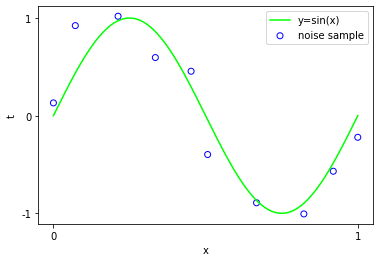

In [141]:
# sample the function curve of y=sin(x) with Gaussian noise
import numpy as np
import matplotlib.pyplot as plt

def generate(num_sample, gauss_noise=False):
    x = np.linspace(0, 2 * np.pi, num_sample, endpoint=True)
    y = np.sin(x)
    
    if gauss_noise:
        np.random.seed(12021092)
        mu, sigma = 0, 0.15
        x[1: -1] += np.random.randn(num_sample - 2) * sigma + mu
        y += np.random.randn(num_sample) * sigma + mu
    return x, y

def init_plot(num_sample):
    plt.xlabel('x')
    plt.xticks([0, 2 * np.pi], ['0', '1'])
    plt.ylabel('t')
    plt.yticks([-1, 0, 1], ['-1', '0', '1'])
    
    x, y = generate(num_sample)
    plt.plot(x, y, color='lime', label='y=sin(x)')
    return x, y

def gauss_sample(num_sample):
    x, y = generate(num_sample, gauss_noise=True)
    plt.scatter(x, y, marker='o', color='none', edgecolor='blue', label='noise sample')
    return x, y

x_sin, y_sin = init_plot(num_sample=200)
x_sin_noise, y_sin_noise = gauss_sample(num_sample=10)

plt.legend()
plt.show()

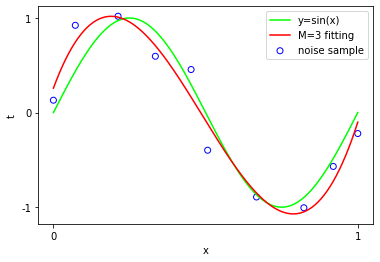

In [142]:
# fit degree 3 curves in 10 samples
x_sin, y_sin = init_plot(num_sample=200)
x_sin_noise, y_sin_noise = gauss_sample(num_sample=10)

def polynomial_curve_fit(x, y, M, reg_lambda=0):
    num_sample = x.size
    H = np.ones((num_sample, M + 1))
    for i in range(M):
        H[:, i+1] = H[:, i] * x
    w = np.linalg.inv(H.T @ H + reg_lambda * np.eye(M + 1)) @ H.T @ y
    
    x = np.linspace(0, 2 * np.pi, 200, endpoint=True)
    H = np.ones((200, M + 1))
    for i in range(M):
        H[:, i+1] = H[:, i] * x
    y = H @ w
    plt.plot(x, y, color='red', label='M=%d fitting' % M)

polynomial_curve_fit(x_sin_noise, y_sin_noise, 3)

plt.legend()
plt.show()

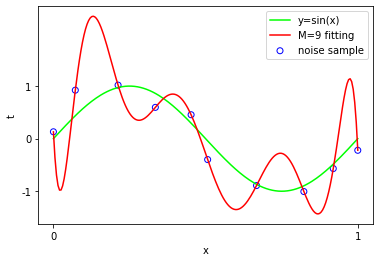

In [143]:
# fit degree 9 curves in 10 samples
x_sin, y_sin = init_plot(num_sample=200)
x_sin_noise, y_sin_noise = gauss_sample(num_sample=10)
polynomial_curve_fit(x_sin_noise, y_sin_noise, 9)

plt.legend()
plt.show()

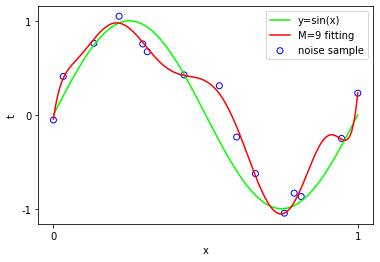

In [144]:
# fit degree 9 curves in 15 samples
x_sin, y_sin = init_plot(num_sample=200)
x_sin_noise, y_sin_noise = gauss_sample(num_sample=15)
polynomial_curve_fit(x_sin_noise, y_sin_noise, 9)

plt.legend()
plt.show()

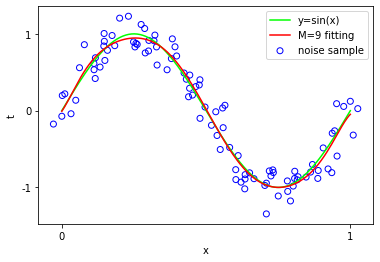

In [145]:
# fit degree 9 curves in 100 samples
x_sin, y_sin = init_plot(num_sample=200)
x_sin_noise, y_sin_noise = gauss_sample(num_sample=100)
polynomial_curve_fit(x_sin_noise, y_sin_noise, 9)

plt.legend()
plt.show()

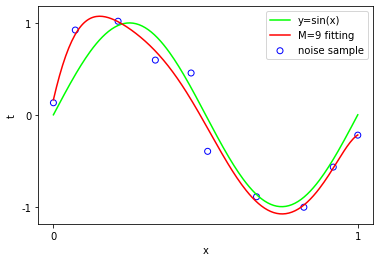

In [154]:
# fit degree 9 curves in 10 samples but with regularization term
x_sin, y_sin = init_plot(num_sample=200)
x_sin_noise, y_sin_noise = gauss_sample(num_sample=10)
polynomial_curve_fit(x_sin_noise, y_sin_noise, 9, reg_lambda=np.exp(-6))

plt.legend()
plt.show()